In [52]:

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.datasets import make_regression

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [53]:
# Step 1: Generate synthetic data

X,y = make_regression(n_informative=100, n_features=10, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [54]:
# Step 2: Base RandomForest Regressor

base_model = RandomForestRegressor(random_state=42)
base_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [55]:
# Predictions and Evaluation

base_pred = base_model.predict(X_test)
base_mse = mean_squared_error(y_test, base_pred)
print(f"Base Random Forest MSE: {base_mse:.4f}")

Base Random Forest MSE: 17051.0720


In [56]:
# Step 3: Hyperparameter Tuning with GridSearchCV

param_grid = {

    'n_estimators' : [50, 100, 200],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]

}

grid_search = GridSearchCV (
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring= 'neg_mean_squared_error'

)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [57]:
# Best Parameters and Model Evaluation

tuned_model = grid_search.best_estimator_
tuned_pred = tuned_model.predict(X_test)
tuned_mse = mean_squared_error(y_test, tuned_pred)

print(f'Tuned Random forest MSE : {tuned_mse:.4f}')

print(f'Best Parameters : {grid_search.best_params_}')

Tuned Random forest MSE : 17051.0720
Best Parameters : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


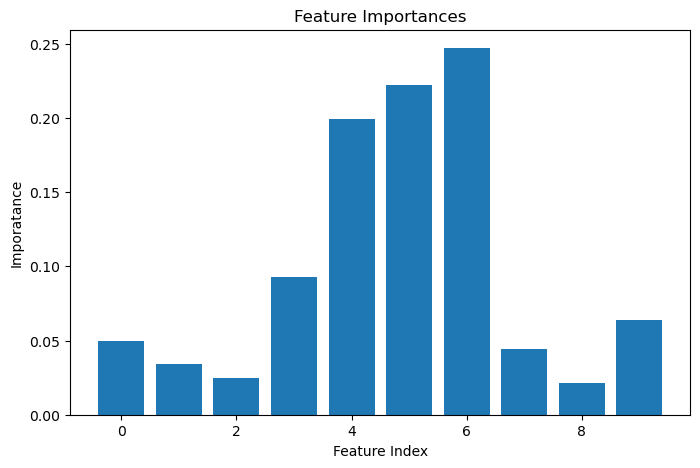

In [58]:
# Step 4: Feature Importance Analysis

feature_importance = tuned_model.feature_importances_

plt.figure(figsize=(8,5))

plt.bar(range(len(feature_importance)),feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Imporatance')
plt.title('Feature Importances')
plt.show()

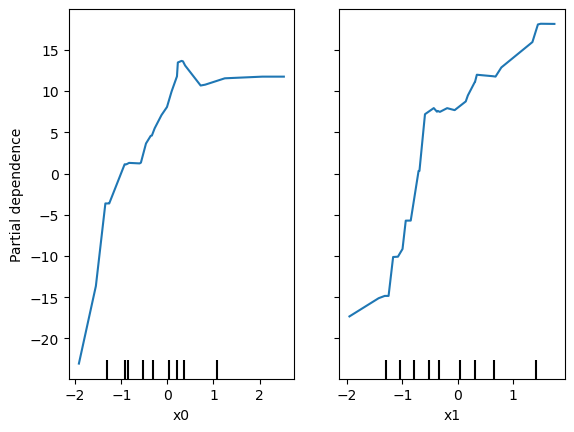

In [59]:
# Step 5: Partial Dependence Plots (Optional Advanced Visualization)

from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(tuned_model, X_test, [0,1])  # Example for 2 features
plt.show()

In [61]:
# Step 6: OOB Score (Out-of-Bag Estimate)

oob_model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

oob_model.fit(X_train,y_train)

print(f'OOB SCORE : {oob_model.oob_score_:.4f}')

OOB SCORE : 0.5591
